<a href="https://colab.research.google.com/github/elleniayele/Prediction-of-Product-Sales1/blob/main/prediction%20of%20product%20sales%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction Of Product Cells
 Elleni


## Project Overview
<br>

## Load And Inspect Data



## Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [9]:
df = pd.read_csv("/content/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

In [11]:
df.shape

(8523, 12)

- There are 607 rows and 12 columns

Checking the data types:

In [12]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- We will drop the Unnamed: 0 column since this column is a repeating of the index.
- We will then check df.info() again to make sure that the column is dropped.


#Duplicated Data

In [13]:
df.duplicated().sum()

0

In [14]:
for col in df:
 print(col)
 print(df[col].unique())
 print('\n\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']



Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7

in the Item Fat Content column, there are values that need cleaning like lowfat and Low Fat same things but different spellings

In [15]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.lower()

In [16]:
df=df.replace(['lf','reg'],['low fat','regular'])
df['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

##Missing Values

In [17]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Inspecting Experience Level:

In [18]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

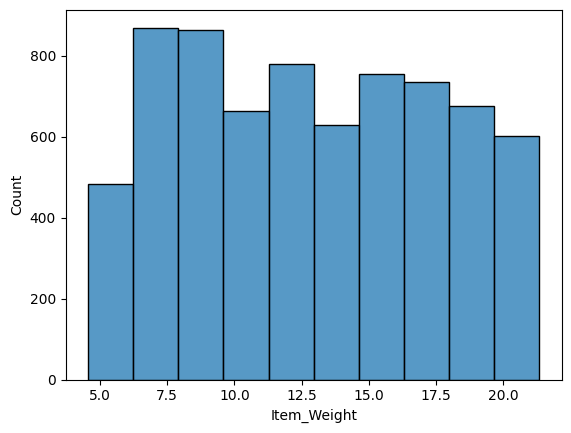

In [19]:
ax = sns.histplot(data = df, x = 'Item_Weight', bins=10);

In [20]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


- I will go with median values

In [21]:
median_value = df['Item_Weight'].median()
df['Item_Weight'] = df['Item_Weight'].fillna(median_value)

- Checking to make sure the values for the Item_Weight column were filled 

---

in.

In [22]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

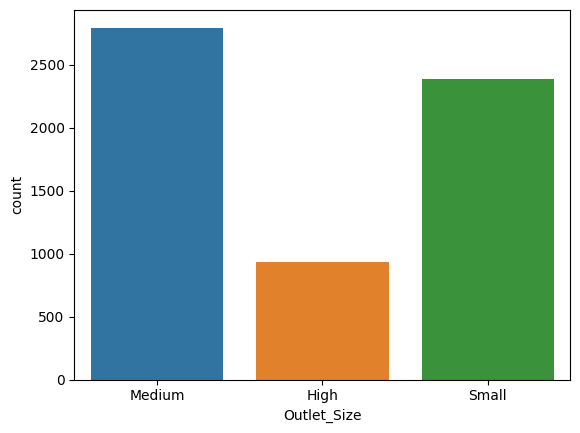

In [23]:
ax = sns.countplot(data = df, x = 'Outlet_Size')

In [24]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [25]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Exploratory Data Analysis





In [26]:
corr = df.corr()
corr

<ipython-input-26-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


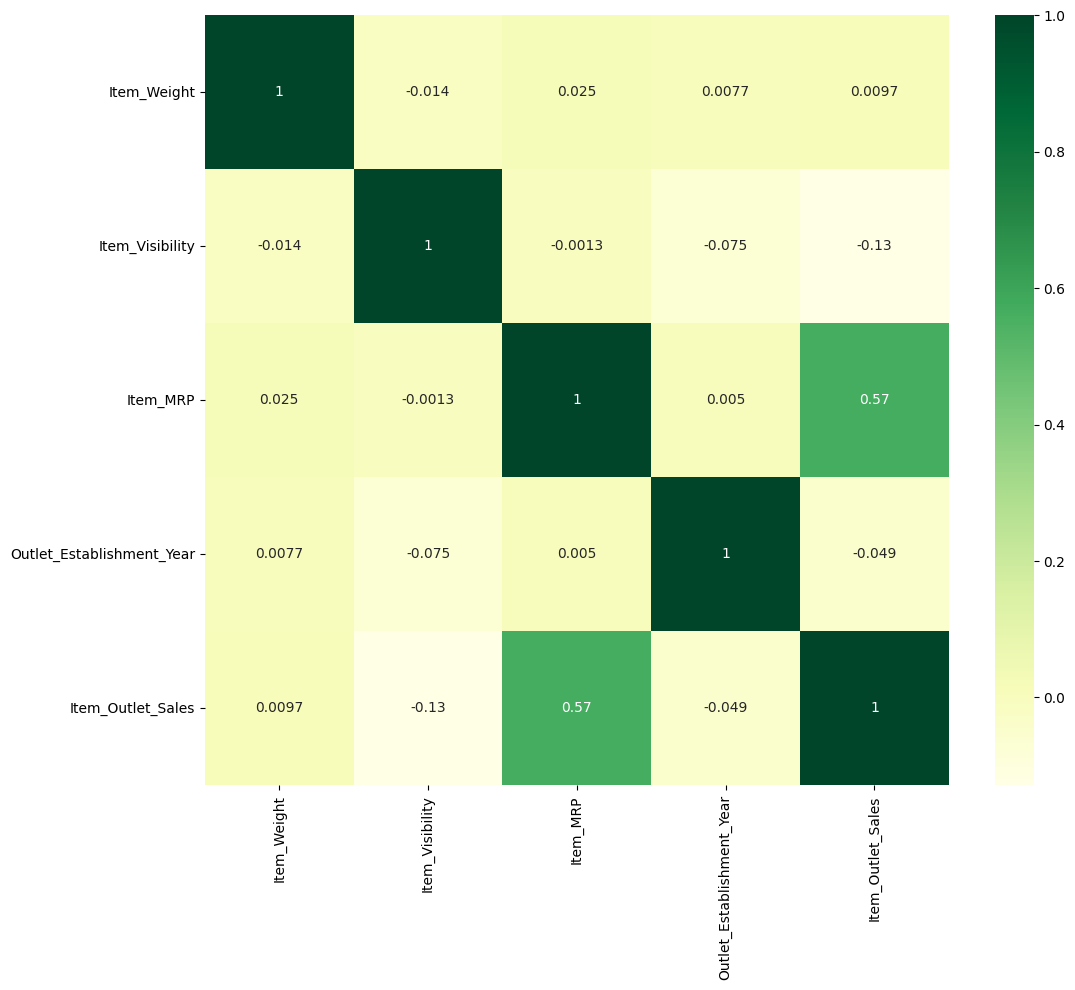

In [27]:
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'YlGn', annot=True);

## Explanatory Data Analysis

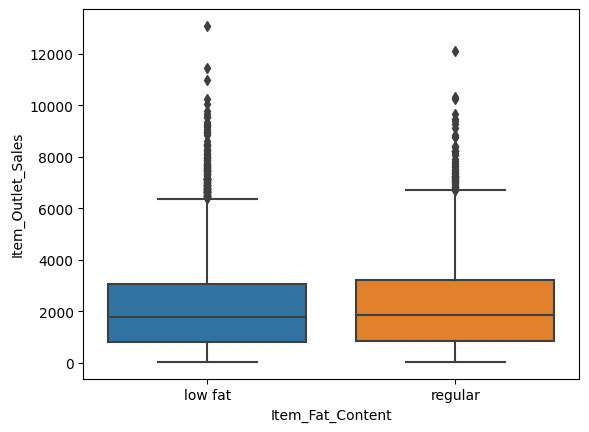

In [28]:
ax = sns.boxplot(data = df, x ='Item_Fat_Content',y='Item_Outlet_Sales');

here we see that regular fat has more sales than low fat content 

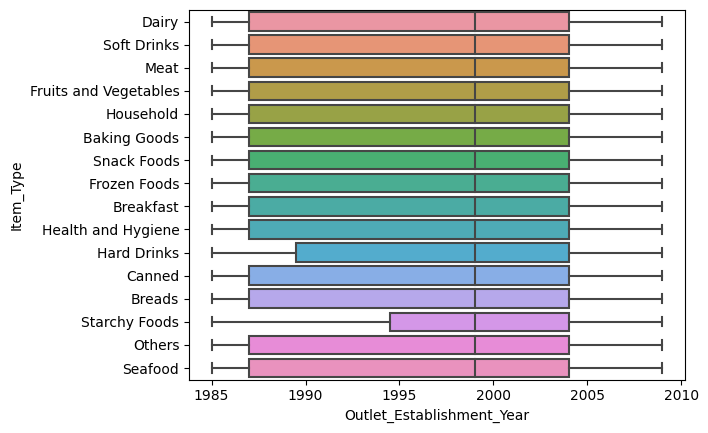

In [29]:
ax= sns.boxplot(data=df,x='Outlet_Establishment_Year',y='Item_Type')

hard drinks and starchy foods have less outlet establishment year

## explanatory visualization

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


 ### Does Item_Weight have an effect over Item_Outlet_Sales?





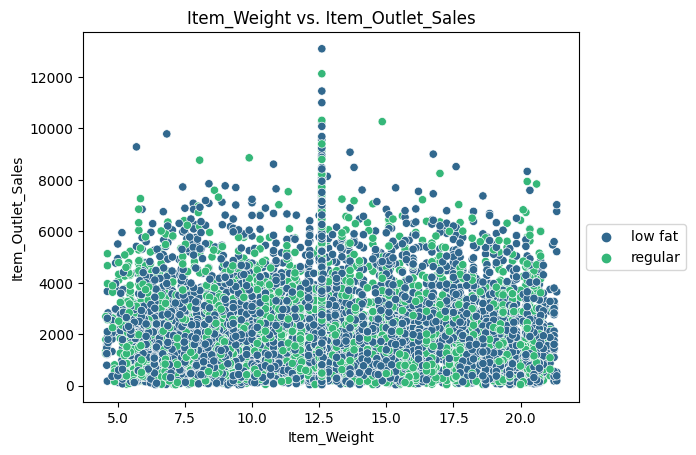

In [74]:
ax =  sns.scatterplot(data = df, x = 'Item_Weight', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content', palette = 'viridis');

## Set the Title
ax.set_title('Item_Weight vs. Item_Outlet_Sales')

## Set the X axis label
ax.set_xlabel('Item_Weight')
ax.legend(bbox_to_anchor = [1, .5]);

### from the graph above, the relationship is pretty scattered all over so it is unknown

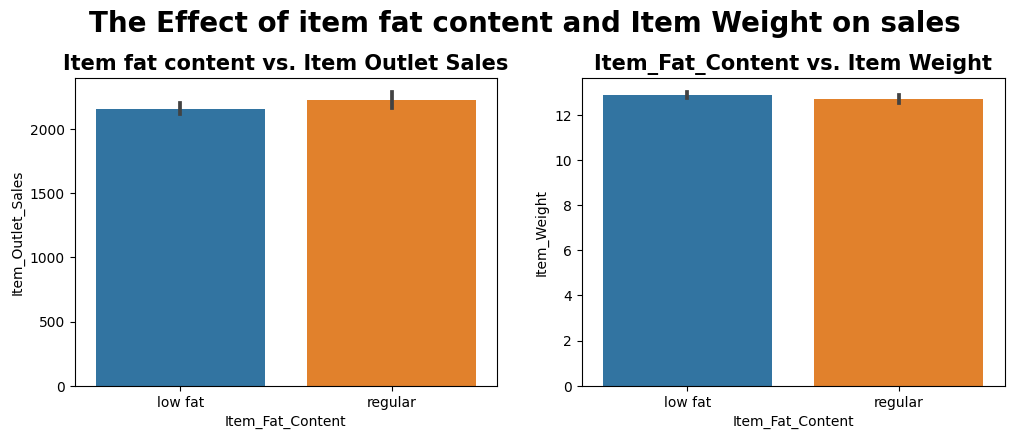

In [75]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))

sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', ax = axes[0])

## Set the Title
axes[0].set_title('Item fat content vs. Item Outlet Sales', fontsize = 15, fontweight = 'bold')
sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Weight', ax = axes[1])

## Set the Title
axes[1].set_title('Item_Fat_Content vs. Item Weight', fontsize = 15, fontweight = 'bold')

## Set the Suptitle
fig.suptitle('The Effect of item fat content and Item Weight on sales', fontsize = 20, fontweight = 'bold', y = 1.05);

## in the graph above, reg has more sales than low fat whereas reg items have a bit less weight than low fats

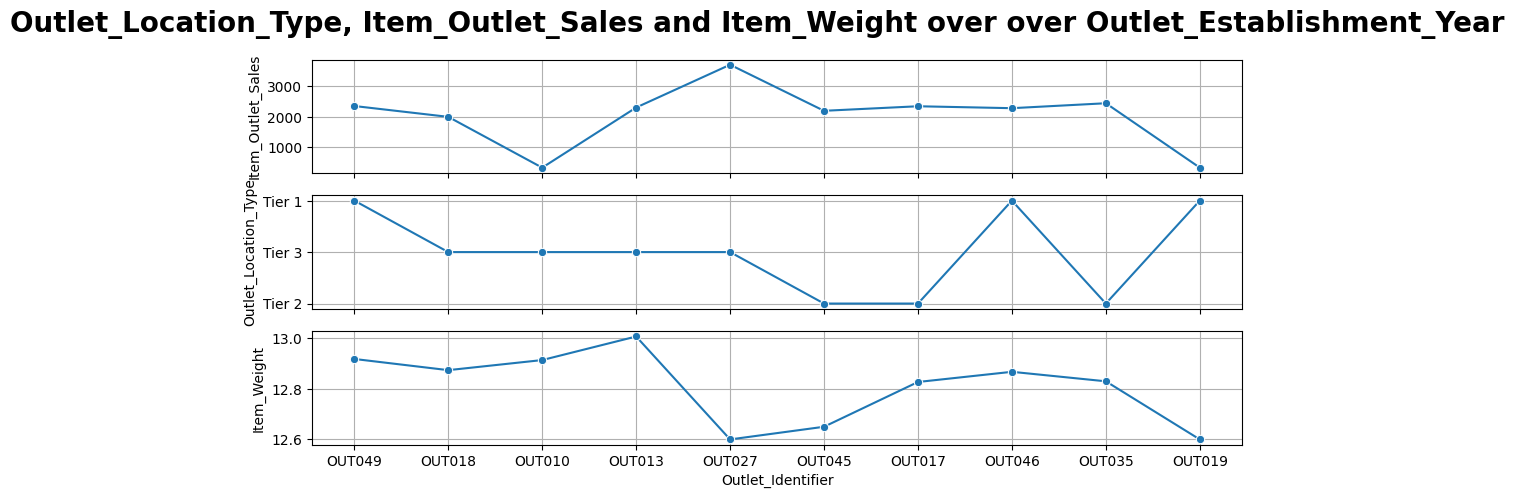

In [86]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, axes = plt.subplots(nrows = 3, figsize = (12,5), sharex = True)
sns.lineplot(data = df, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', errorbar = None, marker = 'o', ax = axes[0])
sns.lineplot(data = df, x = 'Outlet_Identifier', y = 'Outlet_Location_Type', errorbar = None, marker = 'o', ax = axes[1])
sns.lineplot(data = df, x = 'Outlet_Identifier', y = 'Item_Weight', errorbar = None, marker = 'o', ax = axes[2])

# list comprehension
[ax.grid() for ax in axes]

## Set the Suptitle
fig.suptitle('Outlet_Location_Type, Item_Outlet_Sales and Item_Weight over over Outlet_Establishment_Year ', fontsize = 20, fontweight = 'bold');

 in the above the graph item sale has decreased in OUT010 and increased in OUT027 and went down again in OUT019. OUT046 and OUT OUT 49 has higher in tier 1 location type and OUT013 has the heightst weight where as OUT027 and OUT019 has the lowest item_weight  but has regulated for the rest, outlet location type